In [1]:
from IPython import display
import numpy as np

# load netcdf files directly via xarray
import xarray as xr
import matplotlib.pyplot as plt


# Configuration

In [2]:
###########################
## LOAD ERAI data: daily ##
###########################

# load eraionmpi
#mndays = 11688      # 1979-2010

# # 1980-2016 
# mstart = 365
# mndays = 13515    

# 1979-2018 
mstart = 0
mndays = 14610       

mnvars = 8*1
mdv1 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/U850.ERAI.MPIGRID.1979-2018.nc')['U'][mstart:mstart+mndays*1]
mdv2 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/V850.ERAI.MPIGRID.1979-2018.nc')['V'][mstart:mstart+mndays*1]
mdv3 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Q850.ERAI.MPIGRID.1979-2018.nc')['Q'][mstart:mstart+mndays*1]
mdv4 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/T700.ERAI.MPIGRID.1979-2018.nc')['T'][mstart:mstart+mndays*1]
mdv5 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Z700.ERAI.MPIGRID.1979-2018.nc')['Z'][mstart:mstart+mndays*1]
mdv6 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/Z500.ERAI.MPIGRID.1979-2018.nc')['Z'][mstart:mstart+mndays*1]
mdv7 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/U250.ERAI.MPIGRID.1979-2018.nc')['U'][mstart:mstart+mndays*1]
mdv8 = xr.open_dataset('/glade/scratch/dkorytin/erai-on-mpigrid/V250.ERAI.MPIGRID.1979-2018.nc')['V'][mstart:mstart+mndays*1]

print("Days loaded", len(mdv7))


Days loaded 14610


In [7]:
##################
## LOAD GRIDMET ##
##################
# # 1980-1989
# istart = 365
# ndays = 3653  

# # 1980-2016 
# istart = 365
# ndays = 13515 

# 1979-2016
istart = 0
ndays = 13880       

# load files
dv1 = xr.open_dataset('/glade/work/dkorytin/srgan_data/prec128_gridmetA_1979-2016.nc')['prec'][istart:istart+ndays]
# dv2 = xr.open_dataset('/glade/work/dkorytin/srgan_data/tmax128_gridmetA_1979-2016.nc')['tmax'][istart:istart+ndays]
# dv3 = xr.open_dataset('/glade/work/dkorytin/srgan_data/tmin128_gridmetA_1979-2016.nc')['tmin'][istart:istart+ndays]
# dv4 = xr.open_dataset('/glade/work/dkorytin/srgan_data/uas128_gridmetA_1979-2016.nc')['uas'][istart:istart+ndays]
# dv5 = xr.open_dataset('/glade/work/dkorytin/srgan_data/vas128_gridmetA_1979-2016.nc')['vas'][istart:istart+ndays]
# dv6 = xr.open_dataset('/glade/work/dkorytin/srgan_data/huss128_gridmetA_1979-2016.nc')['huss'][istart:istart+ndays]
# dv7 = xr.open_dataset('/glade/work/dkorytin/srgan_data/rsds128_gridmetA_1979-2016.nc')['rsds'][istart:istart+ndays]
# dv8 = xr.open_dataset('/glade/work/dkorytin/srgan_data/miss128_gridmetB_1979-2016.nc')['miss'][istart:istart+ndays]


# Plot routines

In [8]:
def plot_uatm1234(ii):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(14,2))
    mdv1[ii].plot(ax=ax1)
    mdv2[ii].plot(ax=ax2)
    mdv3[ii].plot(ax=ax3)
    mdv4[ii].plot(ax=ax4)

def plot_gridmet1234(ii):
    fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(14,2))
    dv1[ii].plot(ax=ax1)
    dv2[ii].plot(ax=ax2)
    dv3[ii].plot(ax=ax3)
    dv4[ii].plot(ax=ax4)
    
def plot_8v_autoscale(isample, modelname):
    varmames = ['U850', 'V850', 'Q850', 'T700', 'Z700', 'Z500', 'U250', 'V250']
    units = ['m/s', 'm/s', 'kg/kg', 'K', 'mb', 'mb', 'm/s', 'm/s']
    cmaps = ['PiYG', 'PuOr', 'cividis', 'inferno', 'viridis', 'viridis', 'PiYG', 'PuOr']
        
    # autoscale
    vmin = [isample[ii].min() for ii in range(8)]
    vmax = [isample[ii].max() for ii in range(8)]

    # Use 0 as minimum value for Q
    vmin[2] = 0. 

    # Ranges centered on zero for U, V
    vmin[0] = -max(abs(vmin[0]), abs(vmax[0]))
    vmax[0] = max(abs(vmin[0]), abs(vmax[0]))
    vmin[1] = -max(abs(vmin[1]), abs(vmax[1]))
    vmax[1] = max(abs(vmin[1]), abs(vmax[1]))
    
    vmin[6] = -max(abs(vmin[6]), abs(vmax[6]))
    vmax[6] = max(abs(vmin[6]), abs(vmax[6]))
    vmin[7] = -max(abs(vmin[7]), abs(vmax[7]))
    vmax[7] = max(abs(vmin[7]), abs(vmax[7]))


          
    fig, axarr = plt.subplots(1, 8, figsize = (20,20))
    for ii in range(8):
        #axarr[ii].set_title("Subplot row", fontsize=16)
        plot = axarr[ii].imshow(isample[ii][::-1,:], vmin=vmin[ii], vmax=vmax[ii], cmap=cmaps[ii])
        cbar = fig.colorbar(plot, ax=axarr[ii], orientation="horizontal", fraction=0.046, pad=0.016)
        cbar.set_label(units[ii])
        axarr[ii].set_title(varmames[ii])
    plt.suptitle(modelname, y=0.29, fontsize=16)
    plt.show()


# plot_gridmet1234(1132)
# plot_gridmet1234(3690)


# Averages for dry, moist and wet days

In [9]:
###################
## UATM averages ##
###################

def calc_uatm_average(mpr_min, mpr_max, ymin, ymax):
    # global inputs: dv[1-8], mdv[1-8], mnvars
    
    # initialize accumulators
    indices = []
    distribution = []
    raw_ires = len(mdv1[0])
    raininput = np.zeros((mnvars, raw_ires, raw_ires))
    raincount = 0
    
    for ii in range(len(dv1)):
        mpr = dv1[ii].sel(lat=slice(32.125,38.125), lon=slice(-101.875,-93.875)).mean()
        
        # May = 5
        if mpr["time.month"] == 5 and mpr["time.year"] >= ymin and mpr["time.year"] < ymax:    

            if mpr >= mpr_min and mpr < mpr_max:
                distribution.append(mpr)
                indices.append(ii)
                
                # find matching input sample 
                #mdv1.sel(time=ot,method='nearest')
                #isample = [mdv1.sel(time=ot,method='nearest'),mdv2.sel(time=ot,method='nearest'),mdv3.sel(time=ot,method='nearest'),mdv4.sel(time=ot,method='nearest'),mdv5.sel(time=ot,method='nearest'),mdv6.sel(time=ot,method='nearest'),mdv7.sel(time=ot,method='nearest'),mdv8.sel(time=ot,method='nearest')]
                isample = [mdv1[ii],mdv2[ii],mdv3[ii],mdv4[ii],mdv5[ii],mdv6[ii],mdv7[ii],mdv8[ii]]
                isample = np.array(isample)

                raininput += isample
                raincount += 1
            
                #print ("ii, mpr (mm/day)", ii, mpr, ot, mdv1.sel(time=ot,method='nearest')['time'])
                #print()

    raininput /= raincount
    print("days:", raincount)
    
    return raininput, raincount, distribution, indices
    
    


In [10]:
# calc average dry, moist, wet
dryinput, drycount, drydistribution, dryindices = calc_uatm_average(0, 0.254, -9999, 9999) 
moistinput, moistcount, moistdistribution, moistindices = calc_uatm_average(0.254, 3.0, -9999, 9999) 
wetinput, wetcount, wetdistribution, wetindices = calc_uatm_average(3.0, 9999.0, -9999, 9999) 


days: 287
days: 425
days: 466


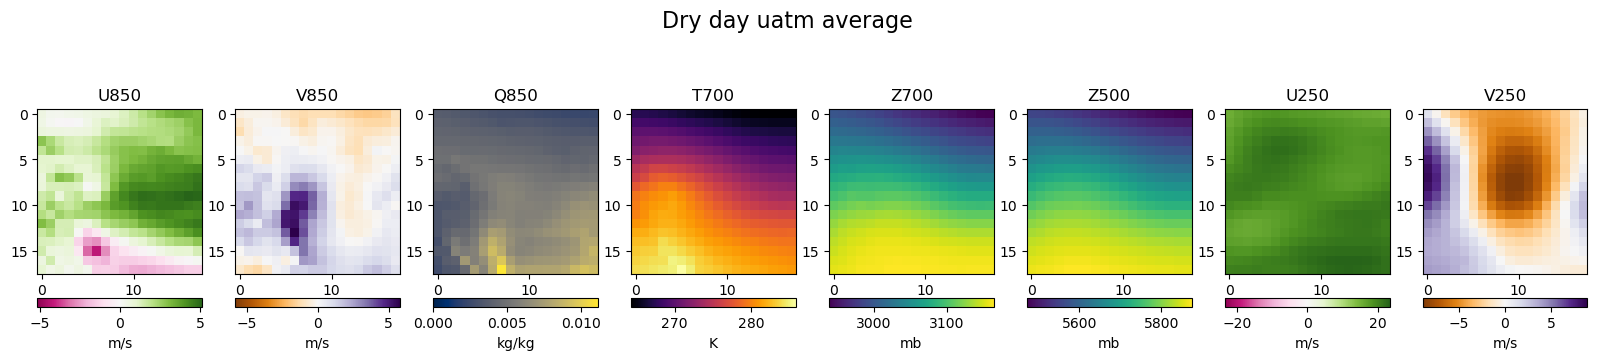

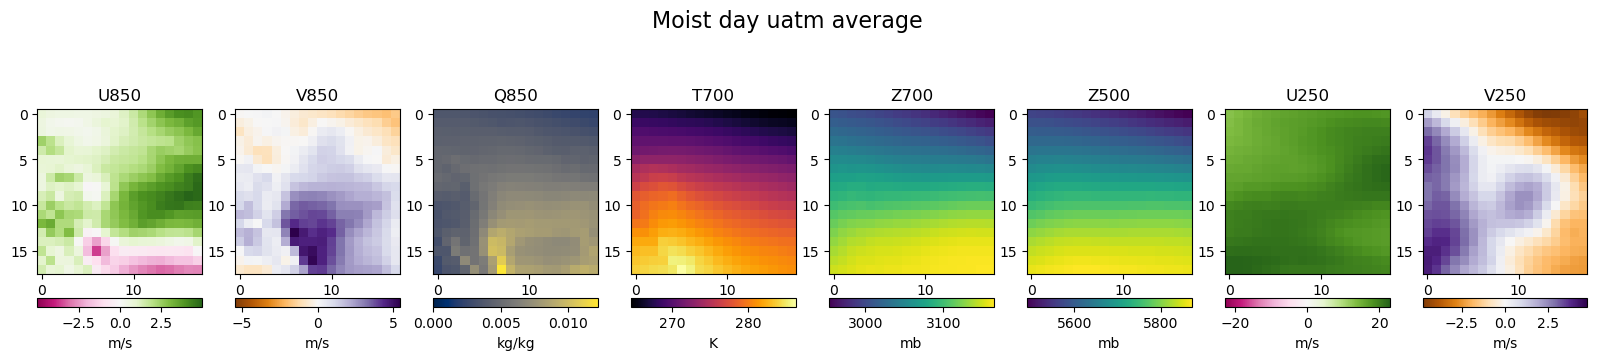

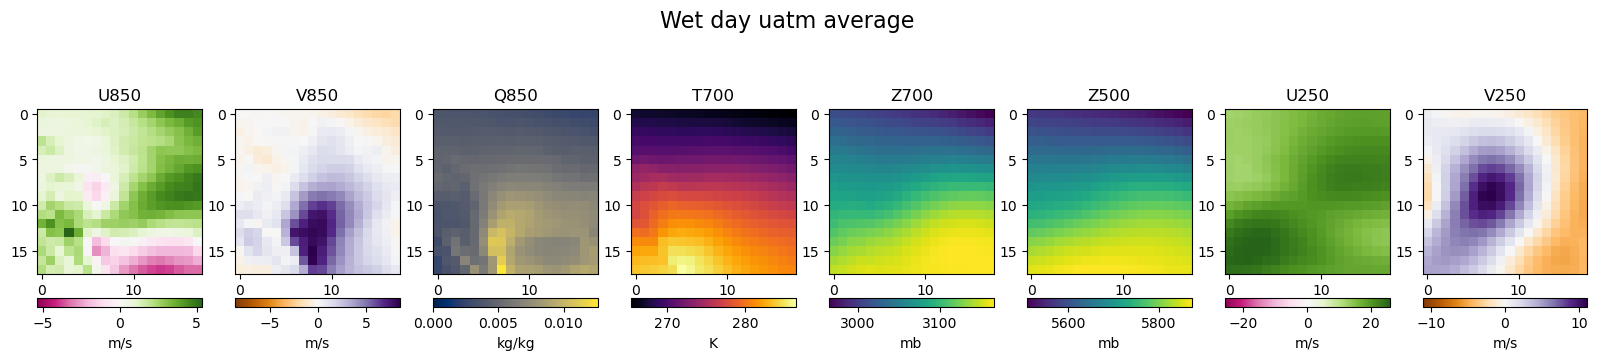

In [11]:
# plot average dry, moist, wet
plot_8v_autoscale(dryinput, 'Dry day uatm average')
plot_8v_autoscale(moistinput, 'Moist day uatm average')
plot_8v_autoscale(wetinput, 'Wet day uatm average')


In [12]:
# # just May's
# mays = np.where(dv1["time.month"] == 5)   # only days that are in May
# plt.hist(ssim_matrix2[2][mays], density=False, bins=100, label='wet class', color="tab:blue")
# plt.hist(ssim_matrix2[1][mays], density=False, bins=100, label='moist class', color="tab:green")
# plt.hist(ssim_matrix2[0][mays], density=False, bins=100, label='dry class', color="tab:orange")
# plt.title("SSIM Distance to Each Class from Days in Mays\n(100 bins)");
# plt.ylabel('Bin count')
# plt.xlabel('SSIM from uatm day to class avg.');
# plt.legend(loc="upper left")

# Anomaly plots

days: 806


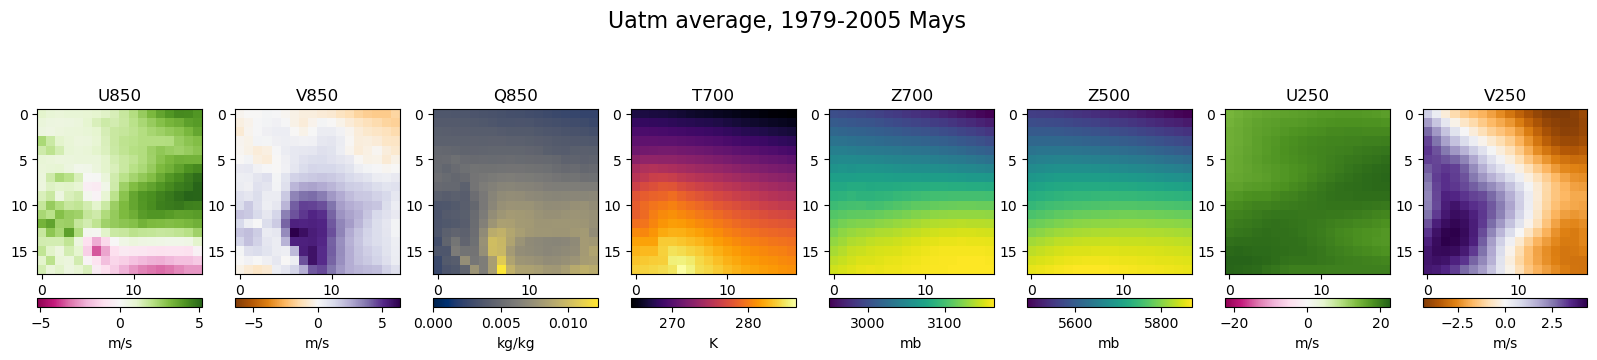

In [13]:
# find average for ALL historical days 
allinput, allcount, alldistribution, dryindices = calc_uatm_average(0, 9999, 1979, 2005) 

# plot average all hist Mays
plot_8v_autoscale(allinput, 'Uatm average, 1979-2005 Mays')


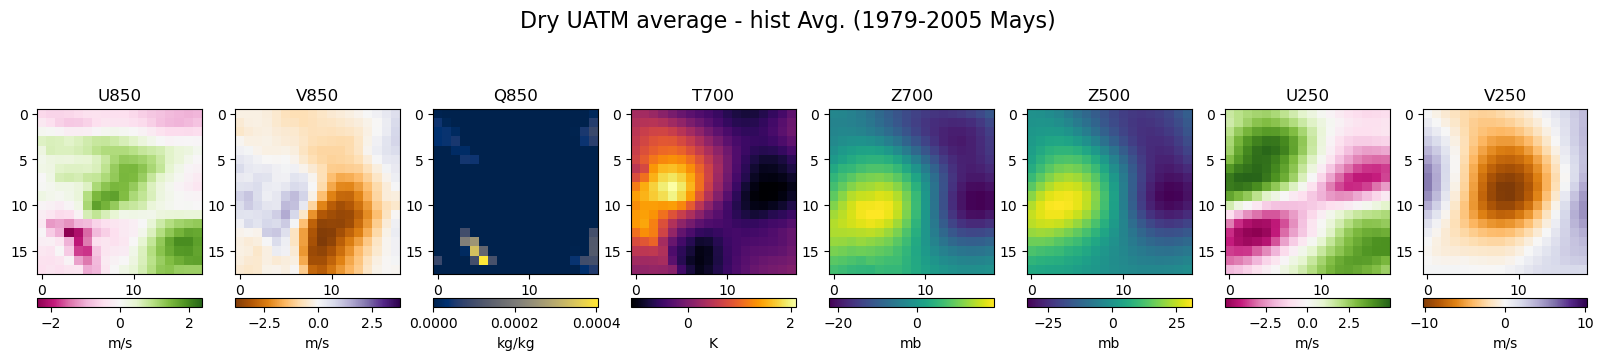

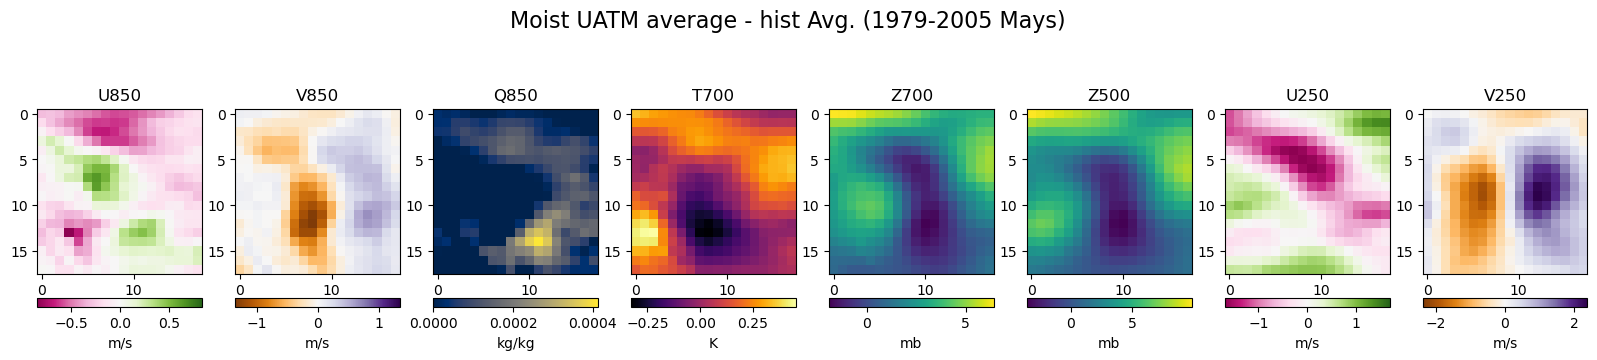

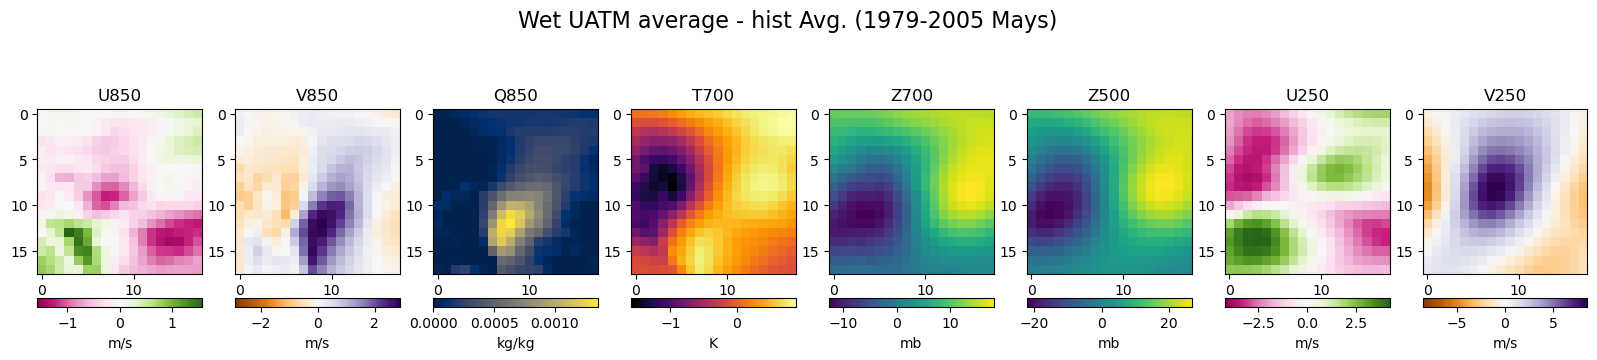

In [14]:
# plot average dry, moist, wet
plot_8v_autoscale(dryinput-allinput, 'Dry UATM average - hist Avg. (1979-2005 Mays)')
plot_8v_autoscale(moistinput-allinput, 'Moist UATM average - hist Avg. (1979-2005 Mays)')
plot_8v_autoscale(wetinput-allinput, 'Wet UATM average - hist Avg. (1979-2005 Mays)')
